In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

Enter temperature difference (e.g. 10):  12
Enter humidity level (0–100):  87


Recommended Fan Speed: 85.95%


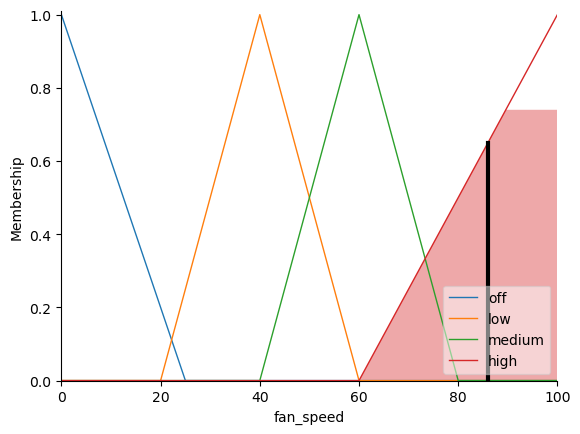

In [7]:
# Define fuzzy variables
temp_diff = ctrl.Antecedent(np.arange(-30, 31, 1), 'temp_diff')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Membership functions for temp_diff
temp_diff['cold'] = fuzz.trimf(temp_diff.universe, [-30, -30, 0])
temp_diff['normal'] = fuzz.trimf(temp_diff.universe, [-5, 0, 5])
temp_diff['hot'] = fuzz.trimf(temp_diff.universe, [0, 30, 30])

# Membership functions for humidity
humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

# Membership functions for fan_speed
fan_speed['off'] = fuzz.trimf(fan_speed.universe, [0, 0, 25])
fan_speed['low'] = fuzz.trimf(fan_speed.universe, [20, 40, 60])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [40, 60, 80])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [60, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(temp_diff['hot'] | humidity['high'], fan_speed['high'])
rule2 = ctrl.Rule(temp_diff['normal'] & humidity['medium'], fan_speed['medium'])
rule3 = ctrl.Rule(temp_diff['cold'] | humidity['low'], fan_speed['off'])

# Build control system
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
fan_sim = ctrl.ControlSystemSimulation(fan_ctrl)

# Input values
fan_sim.input['temp_diff'] = int(input("Enter temperature difference (e.g. 10): "))
fan_sim.input['humidity'] = int(input("Enter humidity level (0–100): "))

# Compute output
fan_sim.compute()
print(f"Recommended Fan Speed: {fan_sim.output['fan_speed']:.2f}%")

# Visualize
fan_speed.view(sim=fan_sim)
plt.show()